# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities[0]

'komsomolskiy'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
latitutde = []
longitude = []

for city in cities:
    # 1 Second sleep time to prevent issues with API timing out
    time.sleep(1)
    try:
        #Add info for each api request to lists
        print(f"Searching for {cities.index(city)}, {city}")
        full_url = f"{base_url}{city}&appid={weather_api_key}&units=metric"
        result = requests.get(full_url).json()
        max_temp.append(result['main']['temp'])
        humidity.append(result['main']['humidity'])
        cloudiness.append(result['clouds']['all'])
        wind_speed.append(result['wind']['speed'])
        country.append(result['sys']['country'])
        date.append(result['dt'])
        latitutde.append(result['coord']['lat'])
        longitude.append(result['coord']['lon'])
    except:
        #If city not found, create Null entires in lists, to drop in DF later
        print("City not found, skipping")
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        country.append(None)
        date.append(None)
        latitutde.append(None)
        longitude.append(None)

Searching for 0, komsomolskiy
Searching for 1, butaritari
Searching for 2, goderich
Searching for 3, mar del plata
Searching for 4, sisophon
Searching for 5, port alfred
Searching for 6, kapaa
Searching for 7, brindisi
Searching for 8, port blair
Searching for 9, methoni
Searching for 10, ushuaia
Searching for 11, jamestown
Searching for 12, avarua
Searching for 13, chatham
Searching for 14, marienburg
Searching for 15, saleaula
City not found, skipping
Searching for 16, hithadhoo
Searching for 17, mataura
Searching for 18, lasa
Searching for 19, paamiut
Searching for 20, souillac
Searching for 21, upernavik
Searching for 22, tongliao
Searching for 23, khatanga
Searching for 24, vestmanna
Searching for 25, belushya guba
City not found, skipping
Searching for 26, leningradskiy
Searching for 27, labuhan
Searching for 28, yarada
Searching for 29, yellowknife
Searching for 30, geraldton
Searching for 31, provideniya
Searching for 32, barentsburg
City not found, skipping
Searching for 33, h

Searching for 265, fukue
Searching for 266, ancud
Searching for 267, faya
Searching for 268, amderma
City not found, skipping
Searching for 269, bataipora
Searching for 270, ghanzi
Searching for 271, avera
Searching for 272, fonte boa
Searching for 273, sabha
Searching for 274, nicoya
Searching for 275, mount isa
Searching for 276, evensk
Searching for 277, netrakona
Searching for 278, yatou
Searching for 279, jalu
Searching for 280, naliya
Searching for 281, lamar
Searching for 282, hofn
Searching for 283, salta
Searching for 284, nome
Searching for 285, eskasem
City not found, skipping
Searching for 286, kpandu
Searching for 287, sangar
Searching for 288, bukachacha
Searching for 289, gat
Searching for 290, hatillo
Searching for 291, haines junction
Searching for 292, zyryanka
Searching for 293, julio de castilhos
Searching for 294, palauig
Searching for 295, tateyama
Searching for 296, tonantins
Searching for 297, san carlos de bariloche
Searching for 298, zolotinka
City not found, 

Searching for 535, ishigaki
Searching for 536, nongan
Searching for 537, pangnirtung
Searching for 538, scarborough
Searching for 539, ayan
Searching for 540, tucuma
Searching for 541, aripuana
Searching for 542, kertosono
Searching for 543, cassilandia
Searching for 544, kenai
Searching for 545, verkh-usugli
Searching for 546, la canada
Searching for 547, pakhtakoron
Searching for 548, lompoc
Searching for 549, ariquemes
Searching for 550, pauini
Searching for 551, madang
Searching for 552, deputatskiy
Searching for 553, vila do maio
Searching for 554, gawler
Searching for 555, ust-kuyga
Searching for 556, olinda
Searching for 557, tavda
Searching for 558, vagur
Searching for 559, grandola
Searching for 560, akureyri
Searching for 561, utiroa
City not found, skipping
Searching for 562, omsukchan
Searching for 563, beidao
Searching for 564, nadym
Searching for 565, necochea
Searching for 566, chiali
City not found, skipping
Searching for 567, tubruq
City not found, skipping
Searching f

In [6]:
city_df = pd.DataFrame({"City": cities,
                        "Lat" : latitutde,
                        "Lng" : longitude,
                        "Max Temp": max_temp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind Speed": wind_speed,
                        "Country": country,
                        "Date": date
                       })
city_df.dropna(inplace=True)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 582
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        526 non-null    object 
 1   Lat         526 non-null    float64
 2   Lng         526 non-null    float64
 3   Max Temp    526 non-null    float64
 4   Humidity    526 non-null    float64
 5   Cloudiness  526 non-null    float64
 6   Wind Speed  526 non-null    float64
 7   Country     526 non-null    object 
 8   Date        526 non-null    float64
dtypes: float64(7), object(2)
memory usage: 41.1+ KB


In [8]:
city_df.Humidity.max()

100.0

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Skipping, no cities with >100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [9]:
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,komsomolskiy,40.4272,71.7189,16.38,25.0,70.0,0.00,UZ,1.635224e+09
1,butaritari,3.0707,172.7902,28.18,75.0,9.0,3.61,KI,1.635224e+09
2,goderich,43.7501,-81.7165,6.21,81.0,100.0,7.20,CA,1.635224e+09
3,mar del plata,-38.0023,-57.5575,13.20,80.0,0.0,1.34,AR,1.635224e+09
4,sisophon,13.5859,102.9737,28.57,63.0,83.0,3.37,KH,1.635224e+09
...,...,...,...,...,...,...,...,...,...
578,abohar,30.1500,74.1833,24.54,37.0,0.0,2.27,IN,1.635225e+09
579,notse,6.9500,1.1667,23.44,94.0,100.0,1.60,TG,1.635225e+09
580,solhan,38.9634,41.0293,3.79,47.0,43.0,1.84,TR,1.635225e+09
581,nishihara,26.1842,127.7558,26.28,52.0,20.0,4.63,JP,1.635225e+09


In [67]:
city_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

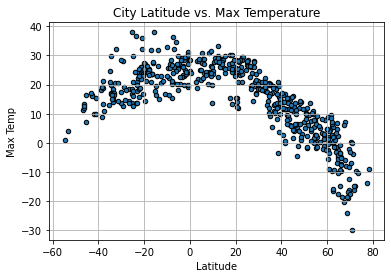

This scatter shows that max temperature is highly correlated with the city's Latitude


In [21]:
city_df.plot.scatter(x='Lat', y='Max Temp', grid=True,edgecolors='black')
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.show()
print("This scatter shows that max temperature is highly correlated with the city's Latitude")

## Latitude vs. Humidity Plot

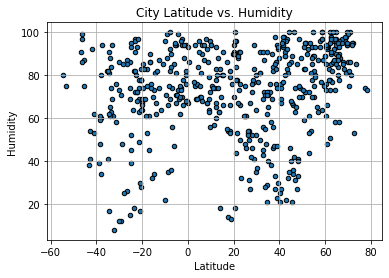

This scatter is showing the relationship between Latitude and Humidity. In general, cities will have higher humididty with higher latitude, but there are plenty of outliers as well


In [20]:
city_df.plot.scatter(x='Lat', y='Humidity', grid=True,edgecolors='black')
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.show()
print("This scatter is showing the relationship between Latitude and Humidity. In general, cities will have higher humididty with higher latitude, but there are plenty of outliers as well")

## Latitude vs. Cloudiness Plot

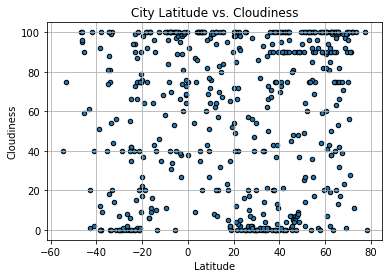

This scatter shows that cloudiness of a city is very independant of Latitude, there is no realistic correclation


In [22]:
city_df.plot.scatter(x='Lat', y='Cloudiness', grid=True,edgecolors='black')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.show()
print("This scatter shows that cloudiness of a city is very independant of Latitude, there is no realistic correclation")

## Latitude vs. Wind Speed Plot

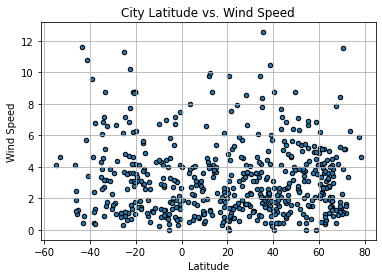

This scatter shows that wind speed doesn't not correlate with Latitude, it is very constant with a few outliers


In [23]:
city_df.plot.scatter(x='Lat', y='Wind Speed', grid=True,edgecolors='black')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.show()
print("This scatter shows that wind speed doesn't not correlate with Latitude, it is very constant with a few outliers")

## Linear Regression

In [25]:
north_cities = city_df.loc[city_df.Lat >= 0, :]
south_cities = city_df.loc[city_df.Lat < 0, :]
north_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,komsomolskiy,40.4272,71.7189,16.38,25.0,70.0,0.00,UZ,1.635224e+09
1,butaritari,3.0707,172.7902,28.18,75.0,9.0,3.61,KI,1.635224e+09
2,goderich,43.7501,-81.7165,6.21,81.0,100.0,7.20,CA,1.635224e+09
4,sisophon,13.5859,102.9737,28.57,63.0,83.0,3.37,KH,1.635224e+09
6,kapaa,22.0752,-159.3190,23.37,88.0,40.0,5.14,US,1.635224e+09
...,...,...,...,...,...,...,...,...,...
578,abohar,30.1500,74.1833,24.54,37.0,0.0,2.27,IN,1.635225e+09
579,notse,6.9500,1.1667,23.44,94.0,100.0,1.60,TG,1.635225e+09
580,solhan,38.9634,41.0293,3.79,47.0,43.0,1.84,TR,1.635225e+09
581,nishihara,26.1842,127.7558,26.28,52.0,20.0,4.63,JP,1.635225e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8909470410826494, showing a high negative correlation


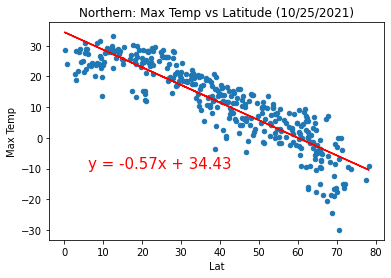

In [78]:
slope,intercept,r,p,se = linregress(north_cities["Lat"], north_cities["Max Temp"])
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_cities.plot.scatter(x='Lat',y='Max Temp')
plt.plot(north_cities["Lat"], intercept+slope*north_cities["Lat"],'r',label='fitted line')
plt.annotate(line_eq,(6,-10),fontsize=15,color='red')
plt.title("Northern: Max Temp vs Latitude (10/25/2021)")
plt.savefig("Output Images/northtempvslat.jpg")
plt.plot()
print(f"The r-value is {r}, showing a high negative correlation")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.5885437021509893, showing a slight positive correlation


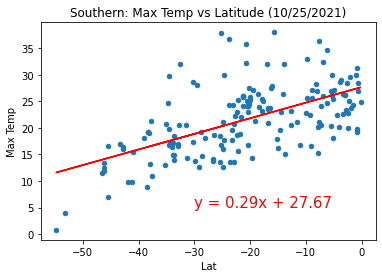

In [79]:
slope,intercept,r,p,se = linregress(south_cities["Lat"], south_cities["Max Temp"])
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_cities.plot.scatter(x='Lat',y='Max Temp')
plt.plot(south_cities["Lat"], intercept+slope*south_cities["Lat"],'r',label='fitted line')
plt.annotate(line_eq,(-30,5),fontsize=15,color='red')
plt.title("Southern: Max Temp vs Latitude (10/25/2021)")
plt.savefig("Output Images/southtempvslat.jpg")
plt.plot()
print(f"The r-value is {r}, showing a slight positive correlation")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.24481675104059497, showing a slight positive correlation


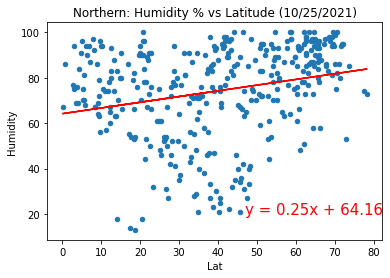

In [80]:
slope,intercept,r,p,se = linregress(north_cities["Lat"], north_cities["Humidity"])
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_cities.plot.scatter(x='Lat',y='Humidity')
plt.plot(north_cities["Lat"], intercept+slope*north_cities["Lat"],'r',label='fitted line')
plt.annotate(line_eq,(47,20),fontsize=15,color='red')
plt.title("Northern: Humidity % vs Latitude (10/25/2021)")
plt.savefig("Output Images/northhumidvslat.jpg")
plt.plot()
print(f"The r-value is {r}, showing a slight positive correlation")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.17960798809773185, showing a slight positive correlation


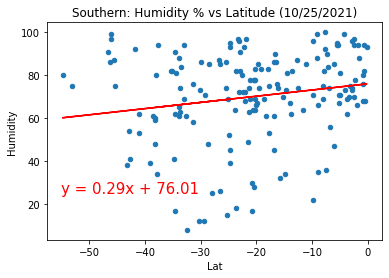

In [81]:
slope,intercept,r,p,se = linregress(south_cities["Lat"], south_cities["Humidity"])
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_cities.plot.scatter(x='Lat',y='Humidity')
plt.plot(south_cities["Lat"], intercept+slope*south_cities["Lat"],'r',label='fitted line')
plt.annotate(line_eq,(-55,25),fontsize=15,color='red')
plt.title("Southern: Humidity % vs Latitude (10/25/2021)")
plt.savefig("Output Images/southhumidvslat.jpg")
plt.plot()
print(f"The r-value is {r}, showing a slight positive correlation")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.12950005076630258, showing a slight positive correlation, albiet with many outliers


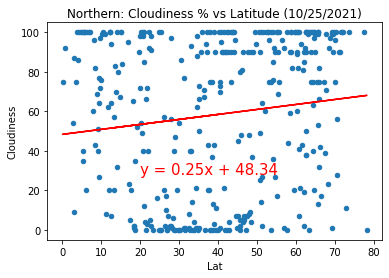

In [82]:
slope,intercept,r,p,se = linregress(north_cities["Lat"], north_cities["Cloudiness"])
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_cities.plot.scatter(x='Lat',y='Cloudiness')
plt.plot(north_cities["Lat"], intercept+slope*north_cities["Lat"],'r',label='fitted line')
plt.annotate(line_eq,(20,28),fontsize=15,color='red')
plt.title("Northern: Cloudiness % vs Latitude (10/25/2021)")
plt.savefig("Output Images/northcloudvslat.jpg")
plt.plot()
print(f"The r-value is {r}, showing a slight positive correlation, albiet with many outliers")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.25246984250658827, showing a small positive correlation


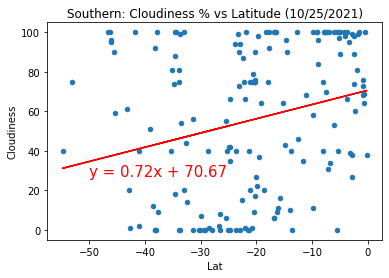

In [83]:
slope,intercept,r,p,se = linregress(south_cities["Lat"], south_cities["Cloudiness"])
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_cities.plot.scatter(x='Lat',y='Cloudiness')
plt.plot(south_cities["Lat"], intercept+slope*south_cities["Lat"],'r',label='fitted line')
plt.annotate(line_eq,(-50,27),fontsize=15,color='red')
plt.title("Southern: Cloudiness % vs Latitude (10/25/2021)")
plt.savefig("Output Images/southcloudvslat.jpg")
plt.plot()
print(f"The r-value is {r}, showing a small positive correlation")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.04713645035168065, showing nearly no correlation


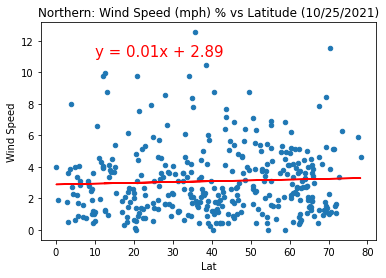

In [84]:
slope,intercept,r,p,se = linregress(north_cities["Lat"], north_cities["Wind Speed"])
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_cities.plot.scatter(x='Lat',y='Wind Speed')
plt.plot(north_cities["Lat"], intercept+slope*north_cities["Lat"],'r',label='fitted line')
plt.annotate(line_eq,(10,11),fontsize=15,color='red')
plt.title("Northern: Wind Speed (mph) % vs Latitude (10/25/2021)")
plt.savefig("Output Images/northwindvslat.jpg")
plt.plot()
print(f"The r-value is {r}, showing nearly no correlation")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.16285387219116823, showing a very slight negative correlation


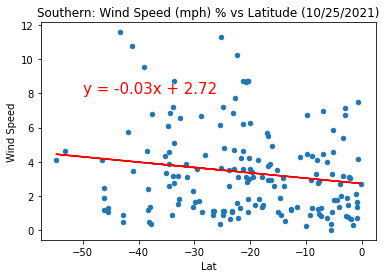

In [85]:
slope,intercept,r,p,se = linregress(south_cities["Lat"], south_cities["Wind Speed"])
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_cities.plot.scatter(x='Lat',y='Wind Speed')
plt.plot(south_cities["Lat"], intercept+slope*south_cities["Lat"],'r',label='fitted line')
plt.annotate(line_eq,(-50,8),fontsize=15,color='red')
plt.title("Southern: Wind Speed (mph) % vs Latitude (10/25/2021)")
plt.savefig("Output Images/southwindvslat.jpg")
plt.plot()
print(f"The r-value is {r}, showing a very slight negative correlation")

In [87]:
print("Three main observations from this data")
print("1: Temperature increases as Latitude approaches 0")
print("2: Wind Speed appears to not have any correllation with Latitude")
print("3: While cloudiness appears to have some correlation, there are many outliers so it is not realistic to call a strong relationship between the two.")

Three main observations from this data
1: Temperature increases as Latitude approaches 0
2: Wind Speed appears to not have any correllation with Latitude
3: While cloudiness appears to have some correlation, there are many outliers so it is not realistic to call a strong relationship between the two.
